# K-Nearest Neighbors - more advanced

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## PREPARE DATA

In [2]:
#Load dataset
df = pd.read_csv('./Dataset/KNN_Project_Data')

In [3]:
#5 first rows of dataset
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


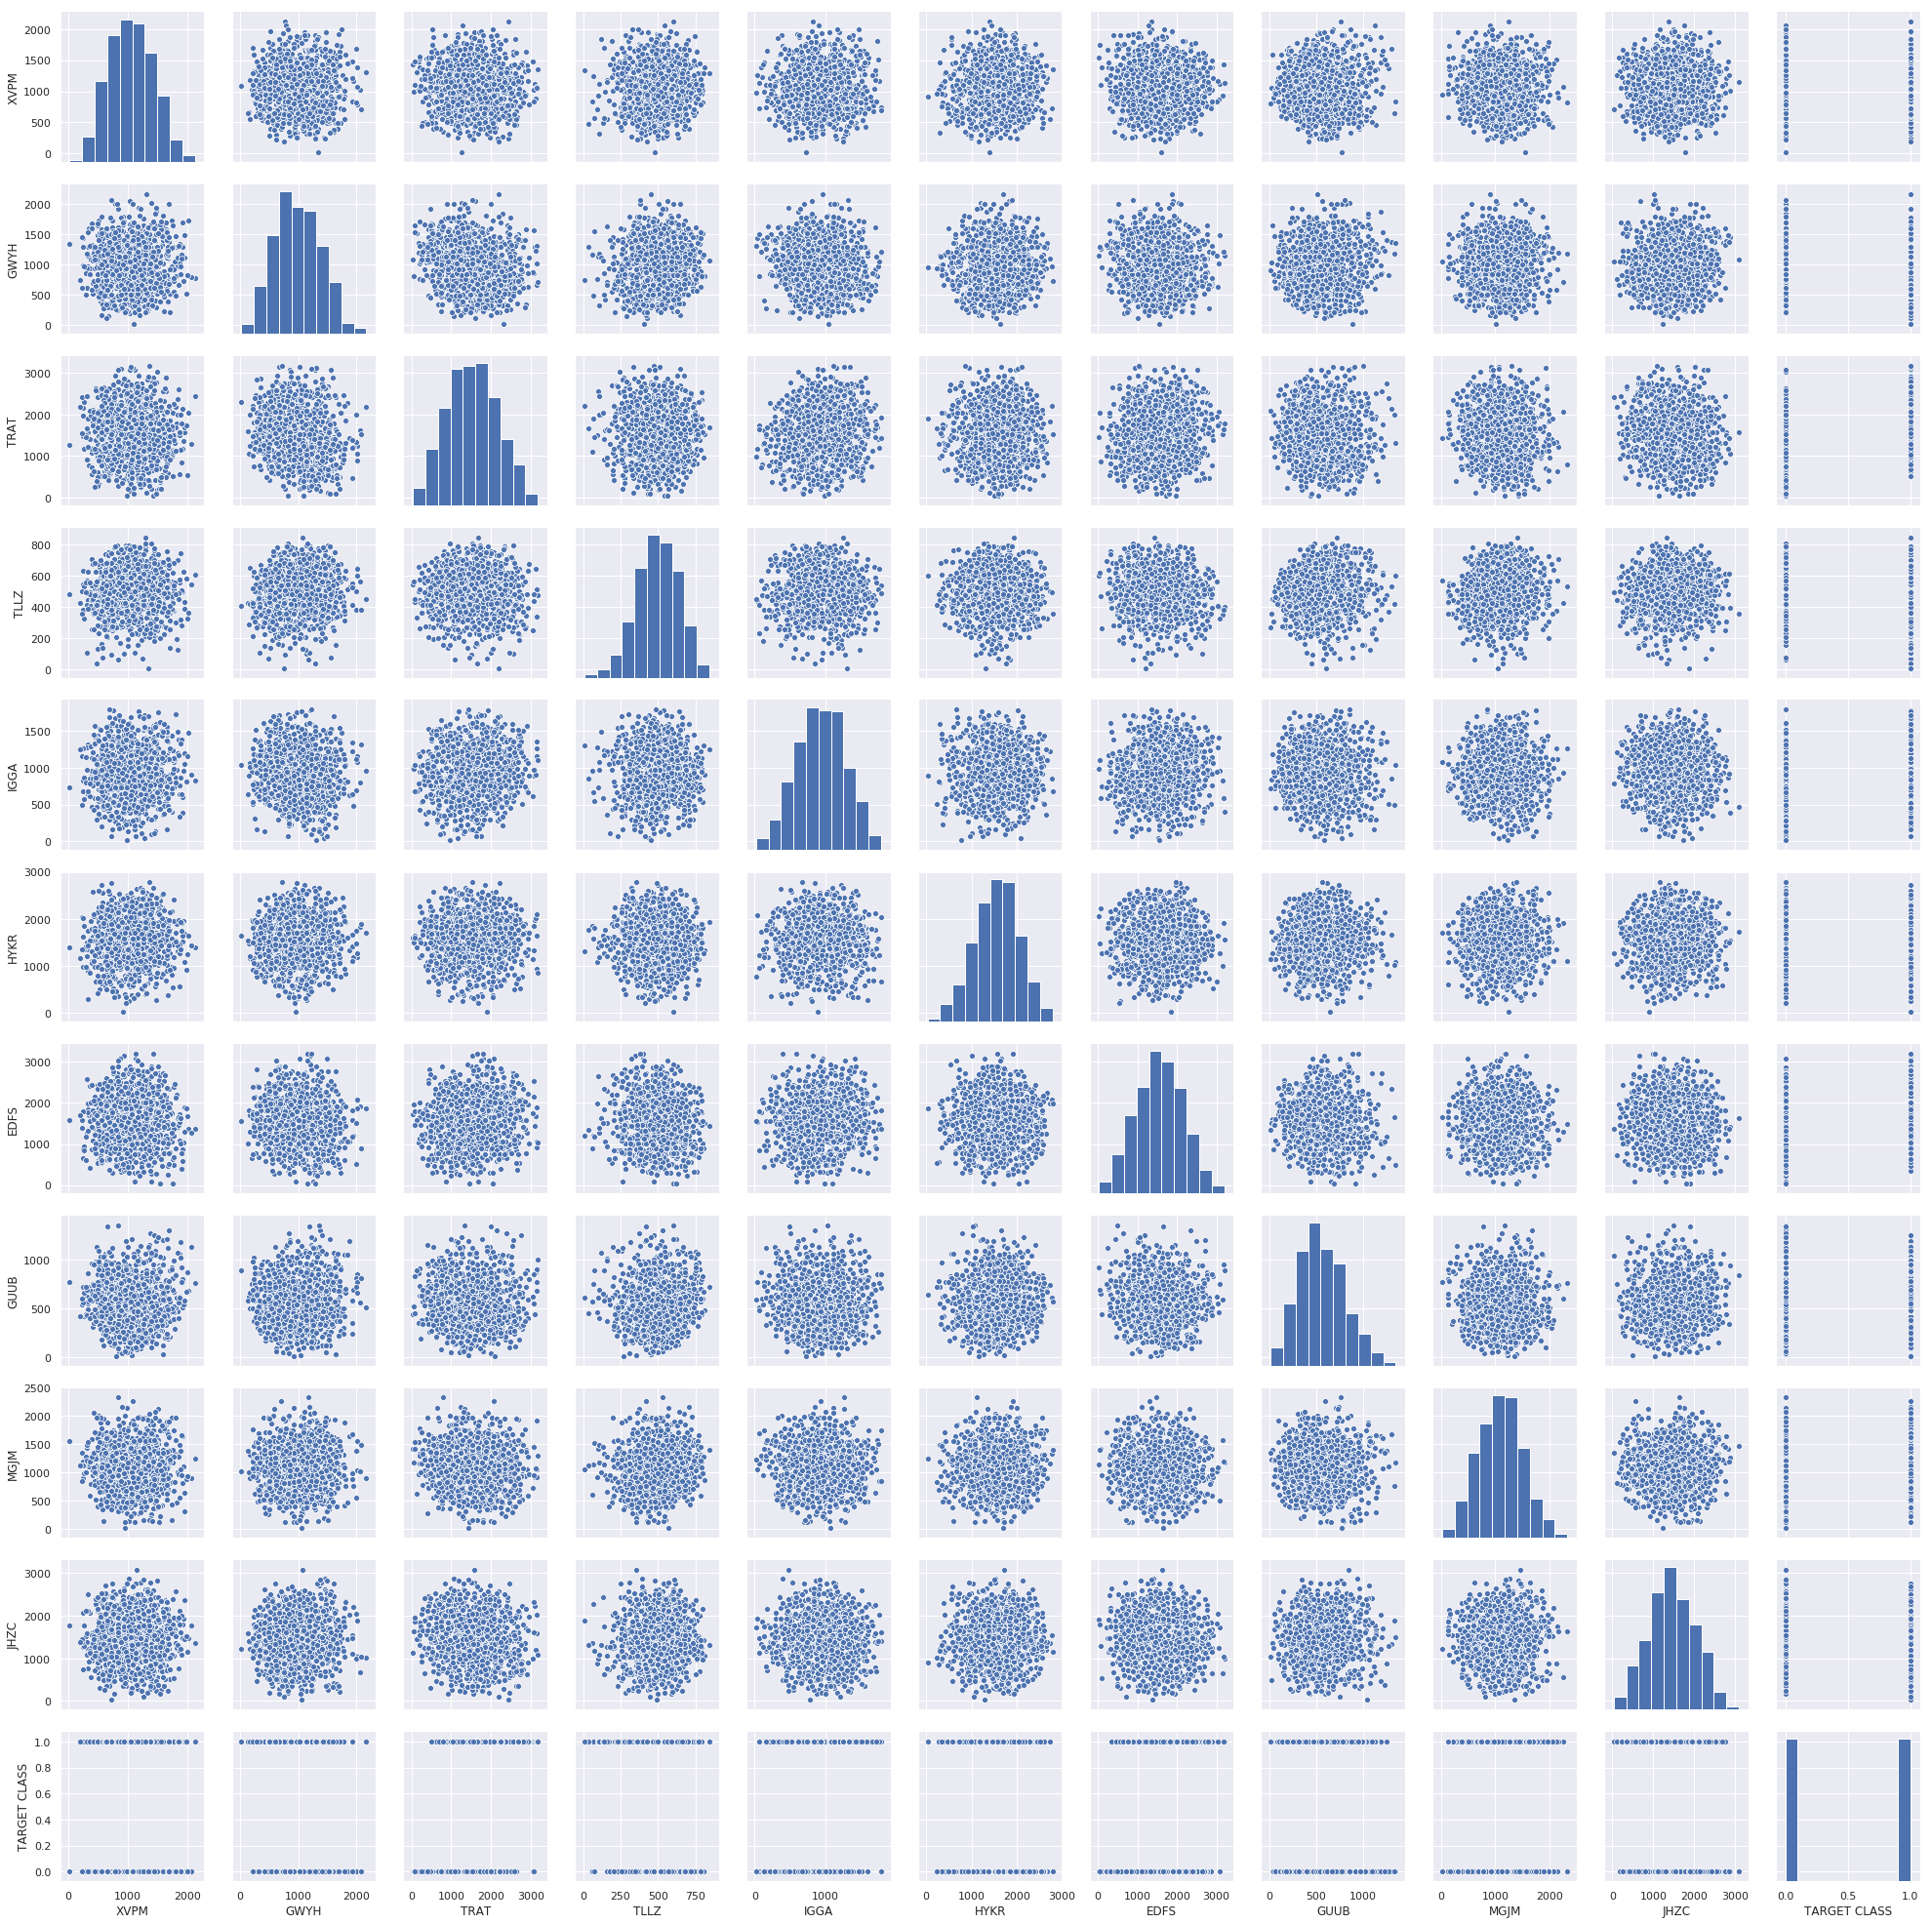

In [4]:
#Correlation between columns
sns.pairplot(df, palette='coolwarm')

In [5]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [6]:
#Scaled data
scaled_features = scaler.fit_transform(df.drop('TARGET CLASS', axis=1))

In [7]:
#Change scaled values to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
#Head of scaled dataset
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [8]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['TARGET CLASS'], test_size=0.3, random_state=101)

## K-Nearest Neighbors

In [9]:
#Create KNeighbors for n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
#Train classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
#Predict test labels
pred = knn.predict(X_test)

In [12]:
#Show metrics for test dataset
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[109  43]
 [ 41 107]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [13]:
#Error for different numbers of n_neighbors
error = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(y_test != pred))

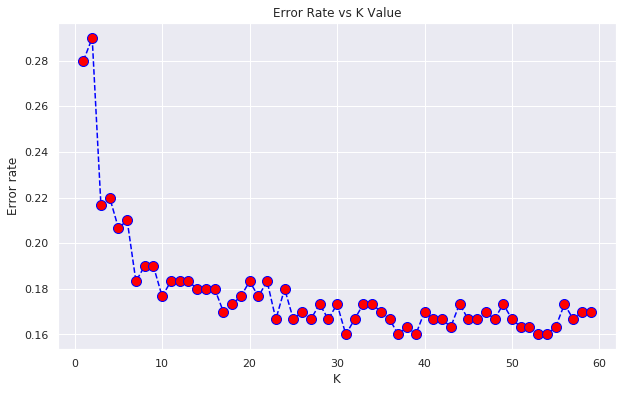

In [14]:
#Plot error rate with different numbers of n_neighbors
plt.figure(figsize=(10, 6))
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.plot(range(1,60), error, color = 'blue', linestyle='--', markersize=10, marker='o', markerfacecolor='red')

In [15]:
#Choose n_neighbors=30
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
#Predict test labels
pred = knn.predict(X_test)

In [16]:
#Show metrics for test dataset
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[124  28]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



### Effectiveness is at a satisfactory level so K-Nearest Neighbors algorithm is good choice for this problem.

### To improve efficiency, it is necessary to experiment with algorithm parameters.